# Shepard Convolutional Neural Networks
Eyad Alshami

## Abstract
Existing deep learning approaches such as convolutional neural networks and sparse auto-encoders are based on translation invariant operators, which can limit the performance if the task requires translation variant interpolation (TVI).
This labbook presents my implementation of the Shepard Convolution Neural Network (ShCNN), which is designed to realize end-to-end trainable TVI operators in the network. The paper shows that by adding only a few
feature maps in the new Shepard layers, the network is able to achieve stronger results than a much deeper architecture.
<br>The labbook explores the proposed ShConv layer and the effect of adding more ShConv layers to a network on performance.

## 1. Introduction
Lately, a lot of research focuses on applying deep learning methods in low-level vision as well as image processing tasks such as image super-resolution, image denoising, and image inpainting. In this labbook we will focus on the problem of **image inpainting**, which is the process of filling in missing or damaged pixels in an image using a fraction of the original image. This can be related to the problem of **interpolation** which is a technique for filling in the gaps in a set of data points using the known values of the other points. It is often used to estimate values that are not known, such as points on a graph between known points. The two problems are related to each other sense that the missing pixel values are interpolated from the known values.

There are a lot of attempts to use deep learning to solve this problem. however, the building blocks of the Deep learning models used are inherently translation invariant. **Translation invariance (TI)**, which is one of the most important features of Convolutional Neural Networks (CNNs), means that when the input shifts the output also shifts but stays otherwise unchanged, in other words the network can recognize an object as an object, even when its appearance shifts in the image *[Figure 1](#Translation_invariance)*. This feature is due to **parameter sharing** where we apply the same filter/kernel all over the image to produce one feature map. Therefore, the filters/kernels will produce the same response at the location of the object, whenever it is in the image *[Figure 2](#Parameter_sharing)*.
Although this is a very important feature, it prevents the network from performing **Translation Variant** operations such as image inpainting, in which the network will be sensetive to the location and translation of the object in the image.

<a id="Translation_invariance"></a>
<div>
<center><img src="images/translation%20invariance.png"/></center>
<center><b>Figure 1</b>: <i>An image shows how the network can recognize an object as an object, even when its appearance shifts in the image.</i></center>
<center><img src="images/parameter_sharing.gif"/><p><b>Figure 2</b>: <i>Applying the same filter all over tha image to produce one feature map.</i></p></center>
</div>

To see why image inpainting is translation variant operation, we can consider [Figure 3](#inpainting_tv). Where we have an image with missing area represented by the black region, and we can see by taking four patches of the image, that the missing pixels distribute differently in each patch. The <code>red</code> dot represtes the ancor point which we want to get a value for by applying the kernel. This shows that image inpainting
cannot be simply modeled by a single kernel due to the inherent spatially varying property. Therefore, it
less optimal to use the traditional convolutional neural network and parameter sharing to do translation variant operation.

<br><br>
<center><div id="inpainting_tv"><img src="images\conv_are_not_translation_variant.png" width="500"/><p> <b>Figure 3</b>: <i>Illustration of translation variant interpolation. (a) The application of inpainting. The black regions
indicate the missing part. (b) Four selected patches. The bottom row shows the kernels for interpolating the
central pixel of each patch.</i></p></div>
</center>

### 1.1 Related Work

With the rappid use of deep learning in the area of low-level computer vision in 2014, a lot of research has incorporated deep learning techniques and architectures to solve the problem of image inpainting. The simplest approaches by [Burger et al.](#Bibliography) was to use a simple multi-layer neural network to learn the mapping between noisy and clear images. In [David Eigen et al.](#Bibliography) they tackel the problem of removing rain drops and dirt in image a Convolutional Neural Network (CNN) with three layers is used to do that, that represents the ability of CNN to blindly handle translation variant problem in real world problems. The first attempt to use CNNs to do image inpainting, failed to beat the state-of-the-art super resolution systems.



The authors of "Shepard Convolutional Neural Network" focused on designing a deep neural network layer that can perform translation variant operations, which could be an essential step for a wide range of low-level vision problems.

### 1.2 Analysis:

Deep learning approaches can generate reasonable results for tasks requiring translation variant properties but are not always the best option due to their complexity. The main focus of the authors was to design simple and high-efficient architectures that can be easily implemented and trained.
<br>They experimented with different architectures, one of them was a network with three convolutional layers trained with ***one million*** synthetic corrupted/clear image pairs. The results, can be seen in [Figure 4](#related_word_results), contained residues of the corruption, text corruption, in them.<br> By adding more layers and training multiple models, the deepest one was 8 layers deep, they found that although they experienced slight improvements, the residues remained.

The sensible next step was trying to explicitly inform the network about the position of the missing pixels. This was done by passing the mask that indicated the missing pixels to the network as an extra channel in the input image. The results showed slight improvements but were still worse than using the 8-layers network.


<center><div id="related_word_results"><img src="images\related_work_analysis.jpg"/><p><b>Figure 4</b><i>: Input images (Left). Results from a regular CNN (Mid). Results from a regular CNN trained with masks (right).</i></p></div></center>

### 1.3 Organisation of the Write-Up

In [Section 2](#2.-Theory:-Shepard-Interpolation-or-Inverse-Distance-Weighted-interpolation) we start with some basic background on the problem and the methodology that the proposed layer is based on, then in [Section 3](#3.-Practice:-Implementation-and-Experiments) we introduce the network architecture and the implementation, and shows some experiments where I tried to increase the depth of the network and see the effect of adding more ShConv layers on the performance.
Finally, the labbook concludes with a comparison of the performance of the network on the different datasets.

Finally, we conclude the template with a [short summary](#Conclusions). As an appendix, you find some [coding guidelines](#Appendix-A:-Coding-Guidelines) that you should adhere to in your python code.

## 2. Theory: 

### 2.1 Shepard Interpolation or Inverse Distance Weighted interpolation:
The intuition when dealing with interpolation problems like image inpainting is that pixel values tend to distribute similarly in a small neighborhood, and this similarity diminishes with distance. In other words, to generate a value for a missing pixel, we can weigh pixels depending on their distance from the unknown one, close pixels have a bigger weight and farther pixels have a smaller weight. So the closer a pixel is to the unknown one, the higher its weight is and vice versa.

The Shepard Interpolation or Inverse distance weighting (IDW) model exactly that intuition, which is a type of deterministic method for multivariate interpolation with a known scattered set of points. The assigned values to unknown points are calculated with an average of the values available at the known points weighted by their inverse distances to the unknown point. The next formula define Shepard interpolation model:
<br><br>

$$u(x)=\left\{\begin{matrix}
\frac{\sum_{i=1}^{N}w_i(x)u_i)}{\sum_{i=1}^{N}w_i(x))} & if \;d(x, x_i)\neq 0 \;for\;all\;i\\ 
u_i & if \;d(x, x_i)=  0 \;for\;some\;i
\end{matrix}\right.\\ \\ where \\ \\ w_i(x)=\frac{1}{d(x, x_i)^p}$$

<br><br>

### 2.2 Shepard Interpolation Demonstration:

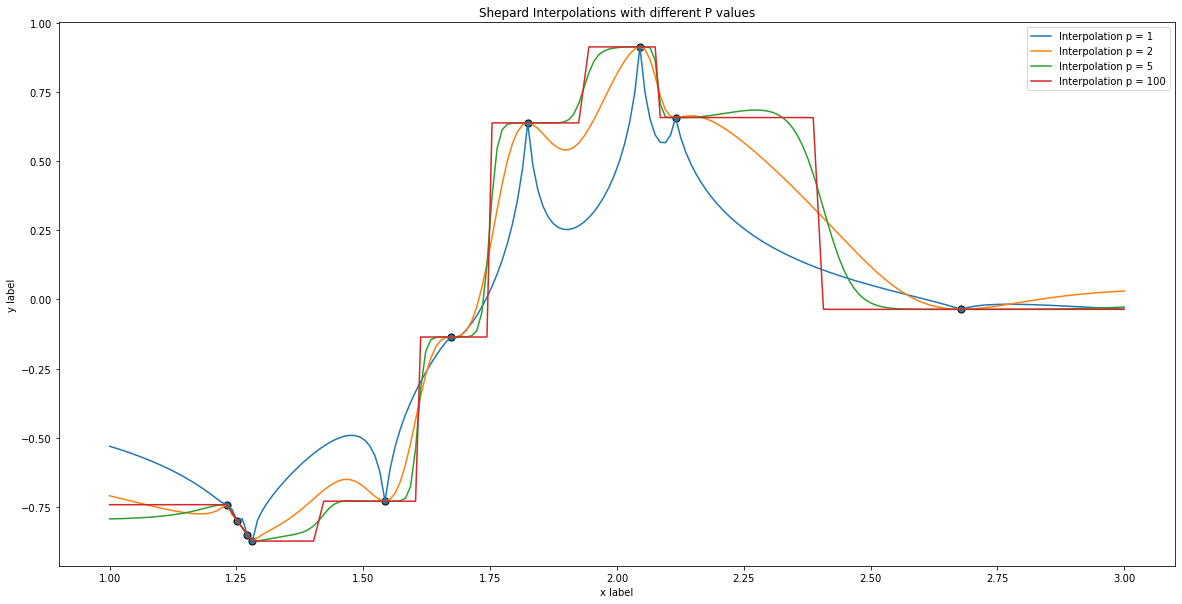

In [5]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from scipy.spatial import distance
import random
import matplotlib.pyplot as plt
# for windows
import os
os.environ["KMP_DUPLICATE_LIB_OK"]="TRUE"

def get_value(x, xs, ys, p=4):
    if (np.any(np.isclose(xs, x))):
        return f(x)
    else:
        dists = [distance.euclidean(x, x_)**(-p) for x_ in xs]
        numerator = [y*w for y,w in zip(ys, dists)]
        return sum(numerator) / sum(dists)

def f(x):
    return np.sin(x**2+(2*x))

x = np.linspace(1, 3, 200)  # Sample data.
y = f(x)
fig, ax = plt.subplots(figsize=(20, 10))
ax.set_xlabel('x label')
ax.set_ylabel('y label')
ax.set_title("Shepard Interpolations with different P values")
inter_values = np.zeros_like(x)
m = 10
inter_is = random.sample(list(range(len(x))), m)
inter_is.sort()
deformed_xs = x[inter_is]
inter_values[inter_is] = x[inter_is]
deformed_ys = f(deformed_xs)

for p in [1, 2, 5, 100]:
    for i, x_ in enumerate(x):
        inter_values[i] = get_value(x_, deformed_xs, deformed_ys, p)
    ax.plot(x, inter_values, label=f'Interpolation p = {p}')

ax.scatter(deformed_xs, deformed_ys, s=50, facecolor='C0', edgecolor='k')
ax.legend()

### 2.3 Shepard Interpolation layer:
The authers leveraged the Shepard interpolation framework to design a neural network architecture for translation variant interpolation tasks. The Shepard interpolation can be written in a convolutional form as:
<br><br>
$$J_p=\left\{\begin{matrix}
(K \ast I)_p / (k \ast M)_p& if\;M_p=0 \\ I_p 
 & if\; M_p=1
\end{matrix}\right.$$

<br><br>
Where $I$ and $J$ are the input and output images, respectively. $p$ indexes the image coordinates. $M$ is the binary indicator, $M_p=0$ indicates unkown pixel value, $M_p=1$ indicates known pixel value. $K$ is the kernel with its weights inversely proportional to the distance between the unknown pixel and the known pixel.
<br><br>

To break down the above formula, $(K\ast I)_p$ represents the ordinary convolution of the kernel with the input image, and $(K\ast M)_p$ represents the convolution of the kernel with the mask that represents the missing pixels. The most important things to note here are, firsr, **the same kernel** is used for both convolutions, and secondly, the element-wise division of the outputs of the convolutions controls the way how pixel information is propagated across the regions. This gives the network the capability to handel interpolation for irrigularly-spaced data and make it translation variant.

<br><br>

$$F^n_i(F^{n-1}, M^n)=\sigma (\sum_{j}\frac{K^m_{ij} \ast F^{n-1}_j}{K^n_{ij} \ast M^n_j} \; + \; b^n), \; n=1,2,3,\cdots $$
<center><font color='green'>Formula 1</font></center>

<br><br>

wher $n$ is the index of layers. The subscript $i$ in $F_i^n$ is the index of feature maps in the layer $n$. The subscript $j$ in $K^m_{ij}$ is the index of the feature maps in the layer $n-1$. where $M^n$ is the mask of the current layer. $F^{n-1}$ represents all the feature maps in the layer $n-1$. $K_{ij}$ is the kernel of the current layer. $b^n$ is the bias of the current layer.

$F^{n-1}$ could be the feature maps of regular layers in a CNN or a pooling layer. It could also be the output of the previous Shepard interpolation layer. Thus we can stack Shepard interpolation layers on top of each other to form a highly nonlinear interpolation operator.

The input mask used is a binary map of valueone for the known area, zero for the misiin area. And the mask for layer $n+1$ can be automatically generated by the reault of previous convolved mask $K^n \ast M^n$, by zeroing out insignificant values and thresholding it.

***Although the paper did not specify or mention any details about the zeroing and thresholding steps,
I found those two steps are essential for the performance of the network, and to get resonable resutls. Besides that the paper mentioned that for inpainting and relativly large missing areas will benefit more from multi-stage Shepard interpolation layer with nonlinearity. <br> They did not provide any details about how they perform the multi-stage shepard interpolation.***


## 3. Practice: Implementation and Experiments

One of the core contributions of your labbook are practical examples and experiments that illustrate the content of your assigned publication. The following sections give you an overview of several basic techniques that will be useful in preparing your practical section. Note that specific methods might require more involved customisation of models. Discuss this with your supervisor in case you need additional pointers.

Before we consider some code examples for learning a general remark: You can execute command line code via !. The example would make sure that tensorflow is installed. This might also be useful to download e.g. external datasets.



For reproducibility, we set the random seed of the libraries used to a specific value.


In [1]:
import torch
import random
import numpy as np
from configs import seed

# fix the seed for reproducibility
seed = seed
torch.manual_seed(seed)
random.seed(seed)
np.random.seed(seed)

### 3.1 A Peak into the Training Data

In this labbook we are going to use the Thumbnails128x128 part of the Flickr-Faces-HQ Dataset. Please __[download it](https://drive.google.com/open?id=1tg-Ur7d4vk1T8Bn0pPpUSQPxlPGBlGfv)__ and place it in the same folder as this jupyter notebook besides the other code.

The downloaded dataset will contain 70 folders, each folder will continue 1000 images of size 128x128. I like to call this heirarchy of folders a *"nested folders"*.

next we will take a peek into the two types of datasets used in the training.

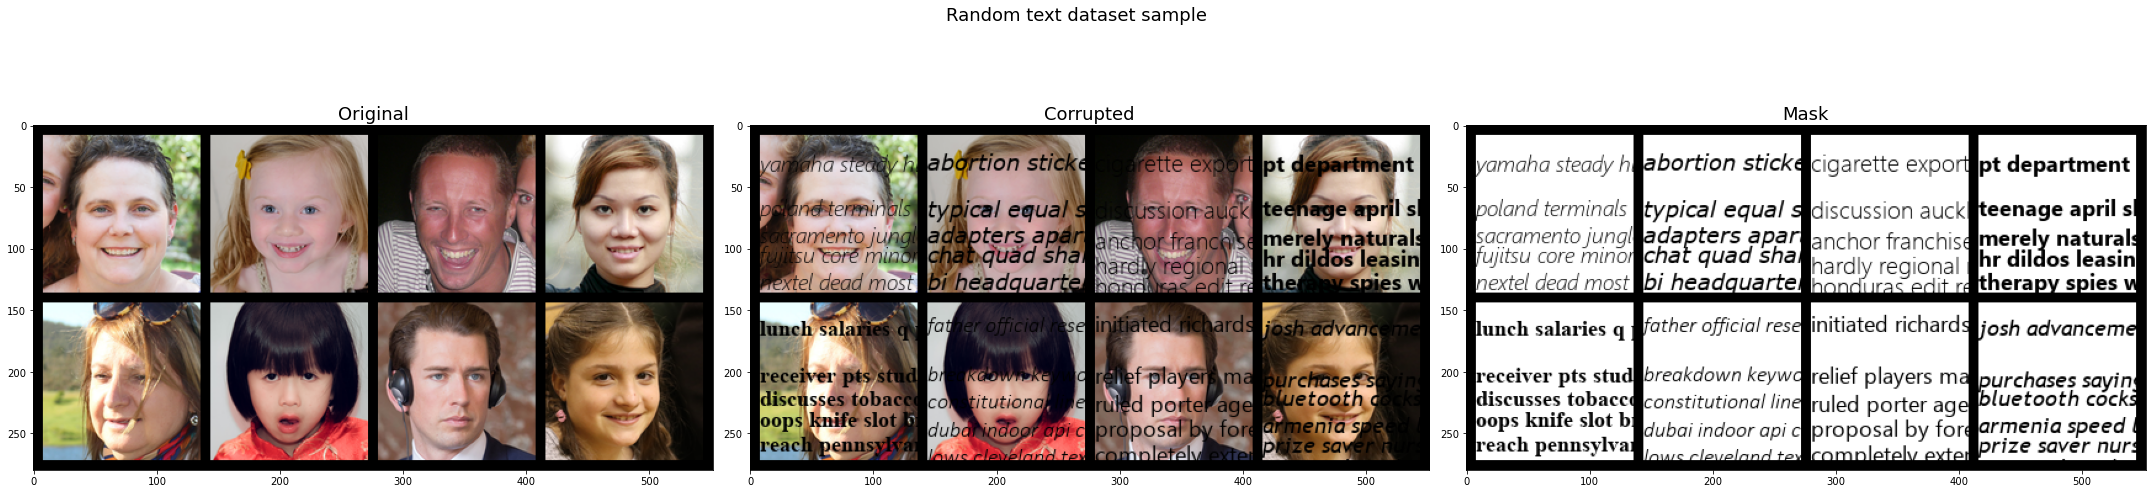

In [18]:
from dataset import ImageInpaintingDataset
from transforms import RandomText, CutOutRectangles, ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision import utils
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

inpaintingDataset = ImageInpaintingDataset(root_dir=r'Filcker Faces thumbnails 128x128',
                                        nested=True,
                                        transform=T.Compose([RandomText(text_size=18), ToTensor()])
                                        )
dataloader = DataLoader(inpaintingDataset, batch_size=8,
                    shuffle=True, num_workers=1, persistent_workers=True)

batch = next(iter(dataloader))
original, corrupted, mask = batch['original'], batch['corrupted'], batch['mask']
original_img_grid=utils.make_grid(original, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
corrupted_img_grid=utils.make_grid(corrupted, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
mask_img_grid=utils.make_grid(mask, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)


fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle('Random text dataset sample', fontsize=18)
ax[0].imshow(original_img_grid)
ax[0].set_title('Original', fontsize=18)
ax[1].imshow(corrupted_img_grid)
ax[1].set_title('Corrupted', fontsize=18)
ax[2].imshow(mask_img_grid)
ax[2].set_title('Mask', fontsize=18)
fig.tight_layout()

inside init of CutOutRectangles


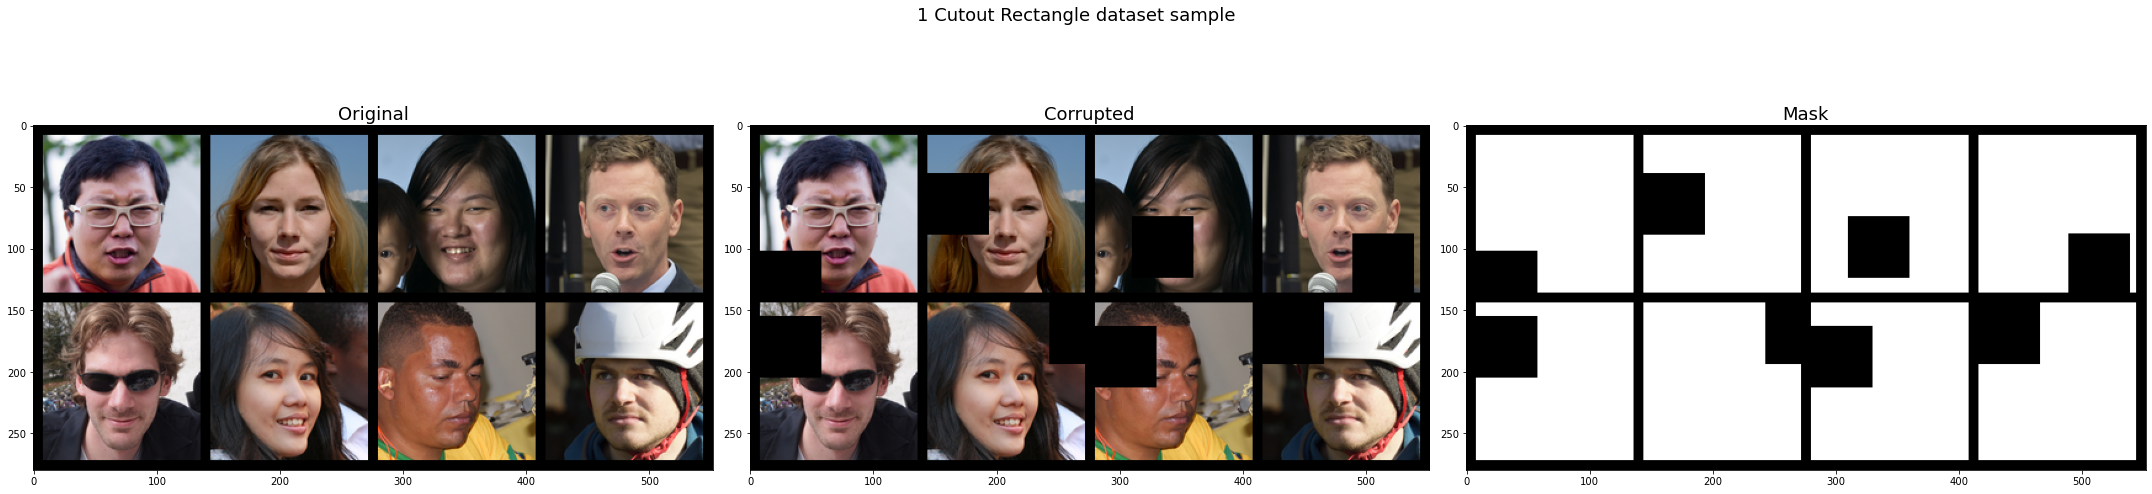

In [16]:
from dataset import ImageInpaintingDataset
from transforms import RandomText, CutOutRectangles, ToTensor
from torch.utils.data import DataLoader
from torchvision import transforms as T
from torchvision import utils
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure

inpaintingDataset = ImageInpaintingDataset(root_dir=r'Filcker Faces thumbnails 128x128',
                                        nested=True,
                                        transform=T.Compose([CutOutRectangles(num_rectangles=1, max_h_size=50, max_w_size=50), ToTensor()])
                                        )
dataloader = DataLoader(inpaintingDataset, batch_size=8,
                    shuffle=True, num_workers=1, persistent_workers=True)

batch = next(iter(dataloader))

original, corrupted, mask = batch['original'], batch['corrupted'], batch['mask']
original_img_grid=utils.make_grid(original, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
corrupted_img_grid=utils.make_grid(corrupted, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)
mask_img_grid=utils.make_grid(mask, nrow=4, padding=8, pad_value = 0).permute(1, 2, 0)


fig, ax = plt.subplots(1, 3, figsize=(30, 8))
fig.suptitle('1 Cutout Rectangle dataset sample', fontsize=18)
ax[0].imshow(original_img_grid)
ax[0].set_title('Original', fontsize=18)
ax[1].imshow(corrupted_img_grid)
ax[1].set_title('Corrupted', fontsize=18)
ax[2].imshow(mask_img_grid)
ax[2].set_title('Mask', fontsize=18)
fig.tight_layout()

I wrote two dataset classes, the first dataset class ```ImageInpaintingDataset``` will generate the corrupted images on the fly by specifying either ```RandomText``` or ```CutOutRectangles``` transforms. However generating the images on the fly might take longer than loading preprocessed images which the second dataset class do. The second dataset class ```PreprocessedImageInpaintingDataset``` will read preprocessed images from the disk.

To generate the preprocessed/corrupted images, one can use the ```preprocess.py``` script using command line. the script will generate a three direcotries under a directory with the name of the corruption, the directories are *original* , *corrupted* and *mask*.

### 3.2 Defining the Model

#### 3.2.1 Defining the Shepard Interpolation Model

$$F^n_i(F^{n-1}, M^n)=\sigma (\sum_{j}\frac{K^m_{ij} \ast F^{n-1}_j}{K^n_{ij} \ast M^n_j} \; + \; b^n), \; n=1,2,3,\cdots $$

From Equation 1, we can see that the inputs to a Shepard Layer are the previous layer's feature maps and the mask. to compute one feature map $F_i^n$ we need the same number of kernels as the number of input feature maps $F_j^{n-1}$. To do this we can use one of the two options:
- Define a tensor for each output feature map in the Shepard layer with the shape ```[in_channels, 1, kernel_size, kernel_size]``` to serve as a kernel, so we will need to define ```#output_channels``` kernels like this.
- Define ```#output_channels``` Conv2d layers with parameters ```(in_channels, in_channels, kernel_size, padding="same", groups=in_channels, bias=bias)```, each layer will serve as a kernel.

We have to ensure that we convolve each input feature map with each kernel channel-wise to produce $J_{th}$ output feature map (I call them intermediate feature maps), after which we can do the element wise division, between them and the convolution output of the kernel with the mask, and then sum accross the channels dimension and apply a nonlinearity to get the final feature map.

In order to do this, we have to use the ```groups``` parameter in the ```F.conv2d``` function or in the ```Conv2d``` layer, depending on which option we go with.

In [23]:
from torch import nn
from torch.nn import functional as F

class ShConv(nn.Module):
    '''
        ShConv layer
    '''

    def __init__(self, in_channels, out_channels, kernel_size, stride=1, padding=0, bias=True, initial_weight=True, threshold = 0.01):
        '''
            in_channels: number of input channels
            out_channels: number of output channels
            kernel_size: size of the convolutional kernel
            stride: stride of the convolutional kernel
            padding: padding of the convolutional kernel
            bias: whether to use bias or not
            initial_weight: whether to initialize the weights or not
            threshold: threshold for ouputing the masks
        '''
        super(ShConv, self).__init__()
        self.in_channels = in_channels
        self.out_channels = out_channels
        self.kernel_size = kernel_size
        self.stride = stride
        self.padding = padding
        self.threshold = threshold
        
        self.zeroing = torch.nn.Threshold(threshold, 0.0)

        if bias:
            self.bias = nn.Parameter(torch.Tensor(out_channels))

        self.kernels = nn.ParameterList()
        for i in range(out_channels):
            self.kernels.append(nn.Parameter(torch.Tensor(in_channels, 1, kernel_size, kernel_size)))

        if initial_weight:
            self.__init_weights()

    def __init_weights(self):
        '''
            Initialize the weights of the convolutional layer
        '''
        for kernel in self.kernels:
            nn.init.kaiming_normal_(kernel)
        nn.init.constant_(self.bias, 0)
    
    def forward(self, masks, x):
        '''
            masks: the masks for the convolutional layer
            x: input tensor
        '''
        # get the device of one of the kernels
        kernel_device = self.kernels[0].device
        # defining the final output
        output_features_map = []
        output_mask = []

        # computing the output for the kernels
        for i, kernel in enumerate(self.kernels):
            intermediate_features_maps = F.conv2d(x, kernel, padding=self.padding, stride=self.stride, groups=x.size(1))
            intermediate_masks = F.conv2d(masks, kernel, padding=self.padding, stride=self.stride, groups=x.size(1))
            intermediate_features_maps /= (intermediate_masks + 1e-8)
            feature_map = intermediate_features_maps.sum(dim=1, keepdim=True) + self.bias[i]
            mask = intermediate_masks.sum(dim=1, keepdim=True)
            output_features_map.append(feature_map)
            output_mask.append(mask)
            
        output_features_map = torch.cat(output_features_map, dim=1)
        output_mask = torch.cat(output_mask, dim=1)

        # zeroing and thresholding
        output_mask = self.zeroing(output_mask)
        output_mask = torch.where(output_mask < 0.0, 0.0, 1.0)
        
        
        return output_features_map, output_mask


batch = 13
in_channels = 8
out_channels = 512
kernel_size = 5
stride = 1
padding = "same"
# TODO: accept both int and string for padding
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
shconv = ShConv(in_channels=in_channels, out_channels=out_channels, kernel_size=kernel_size, stride=stride, padding=padding)
shconv.to(device)

masks = torch.randn(batch, in_channels, 32, 32)
x = torch.randn(batch, in_channels, 32, 32)
x, masks = x.to(device), masks.to(device)
output_features_map, output_mask = shconv(masks, x)
print(f"The size of the batch in this demonstration is {batch}")
print(f"The input features number in this demonstraion is {in_channels}")
print(f"The output features number in this demonstraion is {out_channels}")
print(f"The kernel size in this demonstraion is {kernel_size}")
print(f"The shape of the output feature maps {output_features_map.shape}")
print(f"The shape of the output masks {output_mask.shape}")

The size of the batch in this demonstration is 13
The input features number in this demonstraion is 8
The output features number in this demonstraion is 512
The kernel size in this demonstraion is 5
The shape of the output feature maps torch.Size([13, 512, 32, 32])
The shape of the output masks torch.Size([13, 512, 32, 32])


### Training the Model

The next step is usually the training. Of course it is also allowed to include pre-trained models and to load them in your notebook if you just want to show results. Note that we have already loaded the training dataset previously. In addition, we also prepare a validation set.

Keep in mind that this is only an example. The parameters might not be chosen optimally, as is the combination of model and training data. After compiling the next cell you should see that the loss on both the training and validation data is decreasing, even though the validation data is lagging behind a bit. 

In [ ]:
EPOCHS = 100

# load and prepare validation dataset
dataset_val_path = Path('BSR/BSDS500/data/images/val')
dataset_val_filenames = tf.data.Dataset.list_files(str(dataset_val_path / img_type))
dataset_val = prepare_masked_dataset(
    dataset_val_filenames,
    batch_size,
    img_height,
    img_width,
    mask_density
)

# complete model with optimiser (Adam) and loss function (MSE)
adam_opt = tf.keras.optimizers.Adam(learning_rate=0.001)
model.compile(optimizer=adam_opt, loss='mse')

# training model
model.fit(dataset_train, validation_data=dataset_val, epochs=EPOCHS)


### Testing the Model

As a final step, we check if the model actually performs inpainting on the test data. Since we only want to visualise a few images, we only apply it to a single batch.

The results are not really a convincing inpainting, yet, but they are at least clearly related to the input images. You can improve results by tuning the training parameters (e.g. number of epochs, batch size, more/larger training data etc.) and the network architecture. And of course, you will get much better results with the approaches we discuss in the seminar (in case you choose an inpainting topic). In your own labbook, aim to show some meaningful results. They do not have to be necessarily good, but should highlight strengths, weaknesses, or implementation pitfalls of the method you discuss.

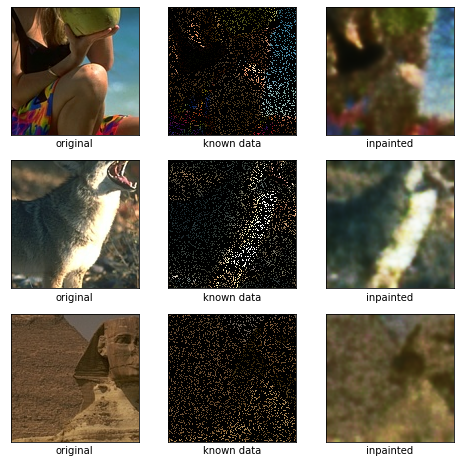

In [5]:
# test the trained model

# load test dataset
dataset_test_path = Path('BSR/BSDS500/data/images/test')
dataset_test_filenames = tf.data.Dataset.list_files(str(dataset_test_path / img_type))
dataset_test = prepare_masked_dataset(
    dataset_test_filenames,
    batch_size,
    img_height,
    img_width,
    mask_density,
    shuffle=False
)

# extract one batch and apply model to it
batch = next(iter(dataset_test))
known_data, originals = batch
results = model.predict(known_data)

# display results
image_list = []
for i in range(3):
    image_list.append((list(originals)[i], "original"))
    image_list.append((list(known_data)[i], "known data"))
    image_list.append((list(results)[i], "inpainted"))

display_images(image_list, rows=3)

## Conclusions

This document demonstrates many techniques for writing a successful labbook for the seminar. Keep in mind to provide both a short explanation of the theory that is focussed on understanding as well as an implementation that focusses on your own experiences with the approach assigned to you. In the final concluding section, **try to formulate clear meassages**. What did you learn about the approach? Do you consider it worthwhile? Do you see potential for improvements? Justify these claims based on theory, your experiments, or on other publications.

The grading will take into account the correctness of scientific content, the amount of additional contributions compared to the original publication, as well as the formal presentation.

## Bibliography

Please order alphabetically first, by publication date second.

[MMCS11] J. Masci, U. Meier, D. Ciresan, and J. Schmidhuber: Stacked convolutional auto-encoders for hierarchical fea-
ture extraction. Artificial Neural Networks and Machine Learning–ICANN 2011, pp. 52–59, 2011.

[NKD16] A. Newell, K. Yang and J. Deng: Stacked hourglass networks for human pose estimation, In B. Leibe, J. Matas, N. Sebe and M. Welling (Eds.): Computer Vision – ECCV 2016, Lecture Notes in Computer Science, Vol. 9912, 483–499, Springer, Cham, 2016

__[[PRNB+17]](http://sibgrapi.sid.inpe.br/col/sid.inpe.br/sibgrapi/2017/09.05.22.09/doc/\_2017\_sibgrapi\_\_Tutorial\_Deep\_Learning\_for\_CV\_\_\_Survey\_Paper\_CRP.pdf)__ M. A. Ponti, L. S. F. Ribeiro, T. S. Nazare, T. Bui, J. Collomoss: Everything you Wanted to Know about Deep Learning for Computer Vision but were Afraid to Ask. Sections I-III. SIBGRAPI Conference on Graphics, Patterns and Images Tutorials, October 2017.

[RFB15] Ronneberger, O., Fischer, P., Brox, T.: U-net: Convolutional networks for biomedical image segmentation. In: Navab, N., Hornegger, J., Wells, W., Frangi, A. (eds.) Medical Image Computing and Computer-Assisted Intervention – MICCAI 2015, Lecture Notes in Computer Science, vol. 9351, pp. 234–241. Springer, Cham (2015)

<div class="alert alert-block alert-danger">
  <b>Attention</b>: Some characters in links need to be escaped such as the underscores (in the admittetly horrible) URL of [PRNB+17]. 
</div>

# Appendix A: Coding Guidelines

<div class="alert alert-block alert-info">
  "When I wrote this code, only God and I understood what it did. Now… only God knows." 
</div>

A developer's goal as author is to make code as easy to understand as possible. Code should be a quick glimpse, not an intense study. The popular paperback model should be our standard. An author is always responsible for making himself clear. It should not be the academic model where a scholar has to dig meaning out of the paper. Hence, it is mandatory to define and follow some coding standards. In the following, the most important concepts and rules will be depicted.

## General

- Do not compare boolean values to True or False, it is enough to write the boolean variable
```python
if a_bool: ...
```
<br>
- Utilise that empty sequences are false in if statements
```python
a_list = []
if not a_list:
    print('Empty')
```
<br>
- Do not use if x: when you mean if x is not None
```python
if arg is not None:
    ...
```
<br>
- Use .startswith() and .endswith() instead of slicing
```python
if word.startswith('un'):
    ...
```
instead of
```python
if word[:2] == 'un':
    ...
```
<br>
Following, we show positive and negative examples of important concepts.

### use meaningful names to prevent comments

If you give your variables speaking names, you do not need comments.

<font color='red'>DON'T</font>
```python
# elapsed time in days
d
```
Don't use non-informative names and explain via comment, what it means.

<font color='green'>DO</font>
```python
eplased_time_in_days
```
The name should directly reveal the intention of the variable.

### meaningful distinction

Use human readable names that are clear without thinking.

<font color='red'>DON'T</font>
```python
d = np.empty(3)
for i in range(s.shape[0]):
    d[i] = s[i]
```
There is no clue to the intention of the author, hence, it takes much longer than needed to understand what is going on.


<font color='green'>DO</font>
```python
destination = np.empty(3)
number_of_elements = s.shape(3)
for index in range(number_of_elements):
    destination[index] = source[index]
```
Now, reading through the code does not cause a problem to understand what is happening.

### avoid mental mapping

Best use problem domain or solution domain terms, so that nobody has to translate names into the right domain.

<font color='red'>DON'T</font>
```python
for element in Container:
    computeMetric(element)
```
In this example you have to map each name to a corresponding meaning, which causes an additional cognitive load.

<font color='green'>DO</font>
```python
for image in ImageBatch:
    computeIntersectionOverUnion(image)
```
Now you can just read and understand it with little effort.

### explain yourself in code

Comments do not make up for bad code.

Nothing can be as helpful as a well-placed comment. However, dogmatic comments only clutter up modules. Even worse, old crufty comments that propagate lies and misinformation can even be damaging. The proper use of comments is to compensate for failure to express ourself in code. We only must have comments when we can't figure out how to express something without comments.

You have written confusing and disorganised code? You think, you better comment it? NO!!! You better clean it!

<font color='red'>DON'T</font>
```python
# check to see if the employee is eligible for full benefits
if ((employee.flags and HOURLY_FLAG) and (employee.age > 65)):
    ...
```

<font color='green'>DO</font>
```python
if (employeee.is_eligible_for_full_benefits())
```
It is always a good idea to hide logic behind abstraction.

# Stick to the following rules

Code should NOT look like as "if a scrambled mass of code was written by a bevy of drunken sailors". Code formatting injects a judgment of the code quality, even without having read the code itself. Hence, we need some formatting rules that generally apply. For specific programming languages (see e.g. PEP8 for Python) there are more special rules, which we will not cover here.

<div class="alert alert-block alert-info">
    You can and should use <a href="https://black.readthedocs.io/en/stable/"><b>black</b></a> to follow coding standards. There is also a Jupyter Notebook version <a href="https://github.com/dnanhkhoa/nb_black"><b>nb_black</b></a>.
</div>

### Naming Style

| Type | Naming Convention | Examples |
| :- | -: | :-: |
|Function | lowercase word(s) | compute_bounding_box
| | separated by _ | add |
|Variable | lowercase single letter or word(s) | x, y, z |
| | separated by _ | bounding_box |
| Class | starts with capital letter | BoundingBox |
| | pascal case (no separator, each new word starts with capital letter) | Optimizer |
| Method | lowercase word(s) | fit |
| | separated by _ | set_learning_rate |
| Constant | uppercase single letter or word(s) | PI |
| | separated by _ | DM_TO_EURO_FACTOR |
| Module | short, lowercase word(s) | optimizer.py |
| | separated by _ | data_handling.py |
| Package | short, lowercase word(s) | numpy |
| | do not separate words | matplotlib

### Code Layout

- classes and top-level functions should be surrounded by two blank lines

```python
class FirstClass:
    pass
 
 
class SecondClass:
    pass
 
 
def main():
    return None
```

- method definitions (inside classes) should be surrounded by one blank line

```python
class FirstClass:
    def first_method(self):
        do_something
 
    def second_method(self):
        do_another_thing
```

- inside function, use blank lines only if needed, e.g. to show clear steps (no example, as this is a suggestion and may be subjective)

### Line Length and Line Breaking

- maximum line length is 88 (according to PEP8 it is only 79) characters
- splitting of too long lines can be addressed via adding '\'
- splitting around binary operators should occur before the operator

```python
result = (first_element
          + second_element
          - third_element)
```

### Indentation

- according to PEP8, we should use 4 consecutive spaces per hierarchy step
- align indented blocks

```python
def example_function(argument_one, argument_two,
                     argument_three, argument_four)
```

- add extra indentation if needed (do not add comments to make nested code more readable)

```python
z = 42
if (z > 41 and
        x < 43):
    print("You all know the answer :-)")
```

### Closing Braces

- line up a closing brace with the first non-whitepace character of the previous line.

```python
a_matrix = [
    1, 2, 3,
    4, 5, 6,
    7, 8, 9
    ]
```

### Documentation Strings

- surrounded by three double quotes (""" This is a docstring. """)
- should be written for each module, function, class, and method that is public
- put """ on a line by itself for multiline docstrings, for one liners keep it on the same line
- there is also the PEP 257, which describes conventions for python docstrings

```python
def my_function():
    """
    This is my function.
    """
```

### Type Hinting

This is a very nice feature as it allows commenting code without comments. Bascially, type hinting adds input and output types to functions.

```python
def say_hello(name: str) -> str:
    return(f'Hello {name}')
```

### Function Definition Layout

Function definitions should have the syntax as shown in the following example.

```python
def my_function(
    int_parameter: int,
    float_parameter: float,
    keyword_parameter: bool = True,
) -> Union[int, float]:
    ...
```

That means:
- No parameter at the function definition
- One parameter each line
- Type hinting used for each parameter and return value
- Closing bracket in a single line followed by output type
- No empty line after function head
- Trailing comma after last argument

This ensures shorter line length and easier readability.

### Whitespaces

- A single space on both sides should be added for the following operators.
    - assignment operators (=, +=, -=, ...)
    - comparisons (==, !=, >, <, <=, >=, is, is not, in, not in, ...)
    - booleans (and, not, or)
    - list slices with variables
- After separators (comma, semicolon) inside brackets and functions.
- For multiple operators, like in mathematical formulas or if statements, only follow this rule for the lowest priority operator.
- Do not use whitepaces for assigning default function arguments.
- Do not add whitespaces at the end of a line (trailing whitespaces).
- Do not put whitespaces immediately inside brackets, as we as before commas and semicolons.
- Do not use whitespaces to align operators.

```python
list[x+1 : x+2 : x+3]
list[1:2:3]
a_list = [1, 2, 3]
 
f = x**2 + 5
g = (x+y) * (x-y)
print(f, g)
 
if x>5 and x%2==0:
    ...
 
def a_function(parameter_with_default=42):
    ...
```